In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error

In [50]:
dfd = pd.read_csv('D:\Project\dfdd.csv')
dfd.index = dfd['Unnamed: 0'].values
del dfd['Unnamed: 0']

dfc = pd.read_csv('D:\Project\dfcc.csv')
dfc.index = dfc['Unnamed: 0'].values
del dfc['Unnamed: 0']

In [51]:
yaxis = dfc['Russia'].values
xaxis = [i for i in range(150,704)]

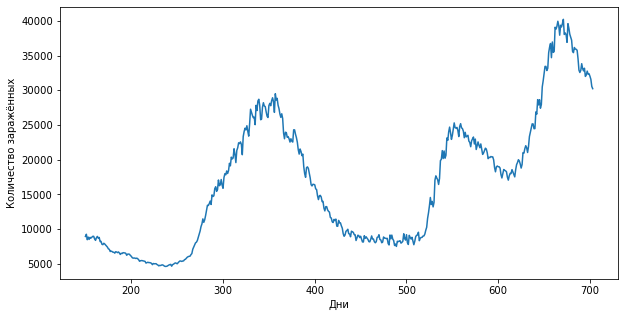

In [52]:
plt.figure(figsize=(10,5))
plt.plot(xaxis, yaxis)
plt.xlabel('Дни')
plt.ylabel('Количество заражённых')
plt.show()

In [53]:
xaxis1 = np.reshape(xaxis, (-1, 1))
lr.fit(xaxis1, yaxis)

LinearRegression()

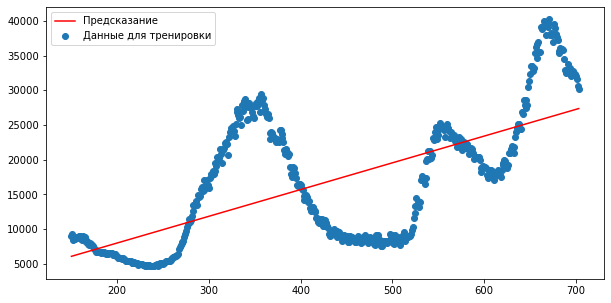

In [54]:
plt.figure(figsize=(10,5))
plt.scatter(xaxis, yaxis, label='Данные для тренировки')
plt.plot(xaxis,lr.predict(xaxis1), label='Предсказание', c='red')
plt.legend()
plt.show()

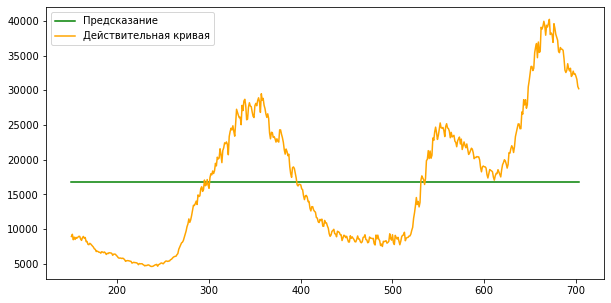

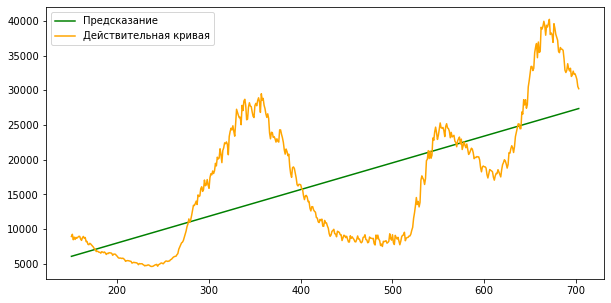

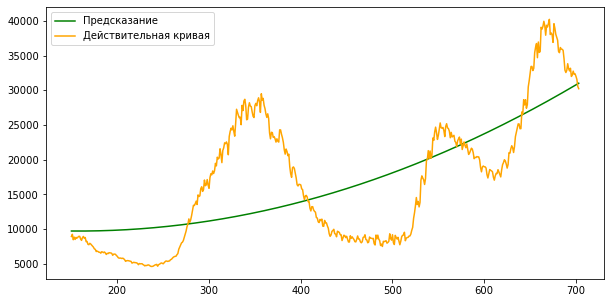

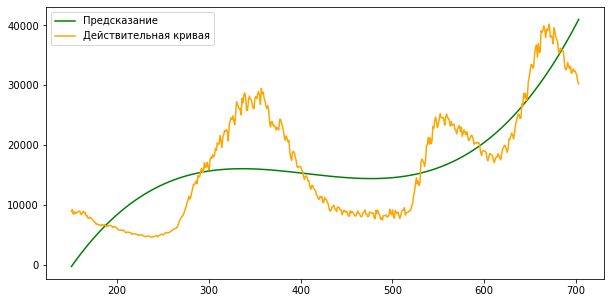

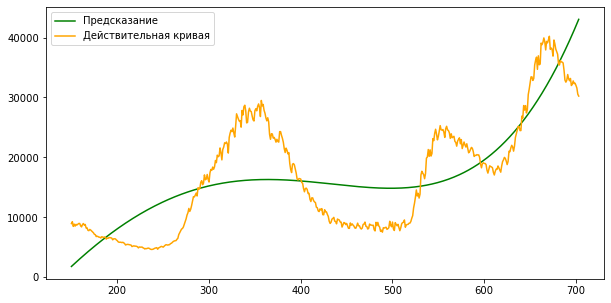

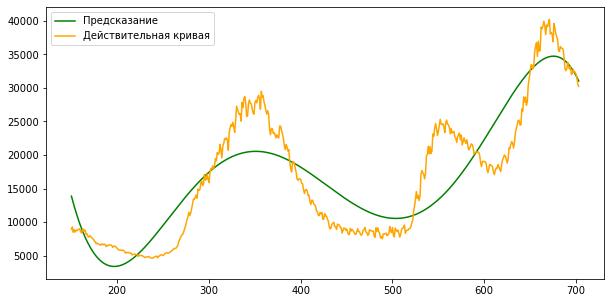

[9477.058928394827,
 7208.653193600122,
 7019.976071145137,
 5894.162933769414,
 5853.412582055506,
 4497.312074533011]

In [75]:
rmses = []
enumerate = [i for i in range(6)]
#enumerate = [2,4,6]

for i in enumerate:
    p = PolynomialFeatures(i, include_bias=True)
    
    xaxis_poly = p.fit_transform(xaxis1)

    lr.fit(xaxis_poly, yaxis)

    xaxis_ = np.linspace(xaxis1.min(0), xaxis1.max(0), 554).reshape(554,1)
    y_pred_lr = lr.predict(p.transform(xaxis_))
    poly_mse = mean_squared_error(yaxis, y_pred_lr)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    plt.figure(figsize=(10,5))
#    plt.scatter(xaxis, yaxis, label='Данные для тренировки') #не вижу смысла проставлять точки, ибо они просто будут накладываться на кривую
    plt.plot(xaxis_, y_pred_lr, label='Предсказание', c='green')
    plt.plot(xaxis, yaxis, label='Действительная кривая', c='orange')
    plt.legend()
    plt.show()
rmses

In [74]:
min(rmses)

4497.312074533011

In [ ]:
rmses